<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Linear Regression with Widgets #
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2023 University of Illinois Board of Trustees. All Rights Reserved.

In [ ]:
### imports and graphics configurations ###

In [ ]:
%matplotlib inline
import ipywidgets
import IPython.display
import numpy
import pandas
import matplotlib.pyplot as plt
import sklearn.linear_model

In [ ]:
def legend(pos="bottom",ncol=3,extra=False):
    if pos=="bottom":
        extra = 0.15 if extra else 0
        plt.legend(bbox_to_anchor=(0.5,-0.2-extra), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

## main

In [ ]:
f_location="https://drive.google.com/file/d/1PA1ixsL-sMfJclTeJWc2lVifp5FtIYpn/view?usp=drive_link"

data_raw=pandas.read_csv('https://drive.google.com/uc?export=download&id='+f_location.split('/')[-2])
data_raw.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,333 Dodge Ave,Evanston,IL,60202,339900,3.0,2.0,...,Active,NaN,NaN,https://www.redfin.com/IL/Evanston/333-Dodge-A...,MRED,11818689,N,Y,42.024226,-87.699124
1,MLS Listing,NaN,Condo/Co-op,2254 Sherman Ave #2,Evanston,IL,60201,199000,2.0,1.0,...,Active,NaN,NaN,https://www.redfin.com/IL/Evanston/2254-Sherma...,MRED,11831019,N,Y,42.059131,-87.682292
2,MLS Listing,NaN,Single Family Residential,2701 Noyes St,Evanston,IL,60201,1075000,5.0,3.5,...,Active,August-5-2023 11:00 AM,August-5-2023 01:00 PM,https://www.redfin.com/IL/Evanston/2701-Noyes-...,MRED,11850222,N,Y,42.058239,-87.710956
3,MLS Listing,NaN,Townhouse,1507 Wilder St,Evanston,IL,60202,825000,4.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/IL/Evanston/1507-Wilder...,MRED,11849960,N,Y,42.040571,-87.693225
4,MLS Listing,NaN,Single Family Residential,9409 Crawford Ave,Evanston,IL,60203,525000,3.0,1.5,...,Active,August-6-2023 02:00 PM,August-6-2023 04:00 PM,https://www.redfin.com/IL/Evanston/9409-Crawfo...,MRED,11849554,N,Y,42.052003,-87.727151


In [ ]:
data_raw.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [ ]:
data_reduced=(data_raw[["SQUARE FEET","PRICE"]]/numpy.array([1000,1E6])).dropna(axis="index")
data_reduced

,SQUARE FEET,PRICE
0,1.520,0.3399
1,0.900,0.1990
2,3.135,1.0750
3,3.219,0.8250
4,1.600,0.5250
...,...,...
97,11.003,3.1000
100,3.200,0.6850
102,2.500,0.6250
104,1.600,0.3449


In [ ]:
data_reduced["PRICE"].mean()

0.8463571707317075

In [ ]:
X=data_reduced["SQUARE FEET"].values
Y=data_reduced["PRICE"].values
lr=sklearn.linear_model.LinearRegression()
lr.fit(numpy.reshape(X,(-1,1)),numpy.reshape(Y,(-1,1)))
(m_opt,b_opt)=(lr.coef_.item(),lr.intercept_.item())

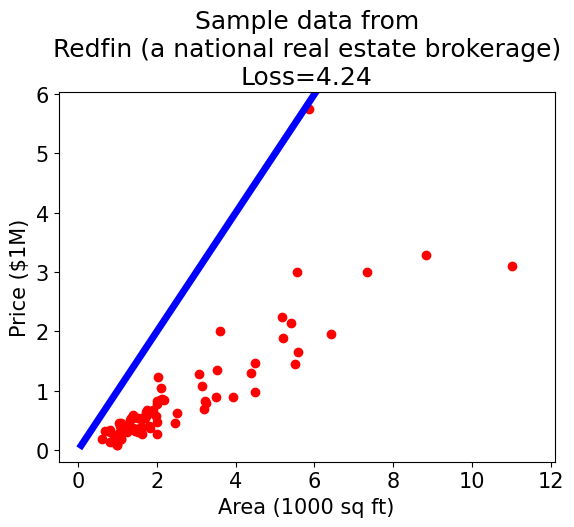

In [ ]:
def plot_LR(m=1,b=1,showloss=True,showoptimal=False):
    plt.figure()

    plt.scatter(X,Y,color="red")
    (xmin,xmax)=plt.xlim()
    (ymin,ymax)=plt.ylim()
    xline=numpy.array([xmin,xmax])
    yline=m*xline+b
    plt.plot(xline,yline,color="blue")
    plt.ylim(ymin,ymax)

    if showoptimal:
      plt.plot(xline,m_opt*xline+b_opt,color="blue",linestyle="dashed",label="Regression Line")
      plt.legend()
    title=[]
    title.append("Sample data from")
    title.append("Redfin (a national real estate brokerage)")
    if showloss:
        loss=numpy.mean((Y-(m*X+b))**2)
        title.append("Loss={0:.2f}".format(loss))
    else:
        title.append(" ")
    plt.title("\n".join(title))
    plt.xlabel("Area (1000 sq ft)")
    plt.ylabel("Price ($1M)")

    plt.show()
    plt.close()


plot_LR(1,0)

In [ ]:
m=ipywidgets.widgets.FloatSlider(value=0.5, min=-1, max=1,step=0.05,description="m")
b=ipywidgets.widgets.FloatSlider(value=data_reduced["PRICE"].mean(), min=-1, max=1,step=0.05,description="b")
showloss=ipywidgets.widgets.ToggleButton(value=False,description='Show Loss',icon='check')
showoptimal=ipywidgets.widgets.ToggleButton(value=False,description='Show Regression Line',icon='check')
out = ipywidgets.widgets.interactive_output(plot_LR, {'m':m,"b":b,"showloss":showloss,"showoptimal":showoptimal})
IPython.display.display(m)
IPython.display.display(b)
IPython.display.display(showloss)
IPython.display.display(showoptimal)
IPython.display.display(out)

FloatSlider(value=0.5, description='m', max=1.0, min=-1.0, step=0.05)

FloatSlider(value=0.8463571707317075, description='b', max=1.0, min=-1.0, step=0.05)

ToggleButton(value=False, description='Show Loss', icon='check')

ToggleButton(value=False, description='Show Regression Line', icon='check')

Output()